## PRCP-1003-Customer Transaction Prediction

## Business Case:- Based on given feature of dataset, identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

## Task 1:-Prepare a complete data analysis report on the given data.

## Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.

# Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
data = pd.read_csv("train(1).csv")
pd.set_option('display.max_columns',None)
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

### DOMAIN ANALYSIS
### INTRODUCTION
*  The dataset is anonymized so we cannot know which feature is what.
There are a total of 200 features in this data set along with ID_code
and target columnion.
#### TARGET COLUMN == TARGET [0, 1]
* 0 RepresentThe customer will not do a transaction.TION
* 1 RepresentThe customer will do a transaction.TION


# Basic Checks

In [3]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [4]:
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722,5.9053,8.1743,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.4110,15.1168,1.6041,6.1868,10.9576,18.7371,15.2986,5.7322,5.1244,9.8225,14.0315,-23.6064,-1.3403,-2.5577,6.3582,-5.4557,5.6063,7.0054,5.0171,-5.0055,28.9502,1.2297,4.4918,19.5568,20.8357,19.2136,17.6422,17.9836,4.0395,14.0761,-5.7878,16.3870,-14.1721,-13.0269,-2.5955,21.4526,15.6163,0.9845,8.2110,-0.8553,-12.1682,6.7779,7.3895,10.5084,15.5057,-0.6812,5.8999,6.1825,3.1038,-1.6930,-18.8473,9.9358,25.3359,1.3647,11.8509,5.0357,6.4630,18.4008,14.3787,19.0369,-0.6364,6.9155,3.6763,3.1460,4.9442,-1.8289,1.3521,34.6265,-0.6869,-5.3781,20.5030,10.9614,4.9677,6.1408,2.2575,12.8757,14.2253,-1.2868,0.2212,16.8661,12.7663,1.2414,7.1304,7.4108,-6.3369,3.0760,24.9796,20.3410,5.3312,23.7116,2.4745,11.2013,17.8165,13.0057,9.5506,5.3589,13.2491,-3.3068,3.6998,2.5927,14.3025,8.1596,7.9609,18.3343,4.3086,1.3546,12.4158,-5.3985,16.3683,10.4522,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862,-7.8820,7.1320,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.6910,10.2453,6.8173,4.5666,-9.5685,18.4685,16.9534,7.3660,4.7038,9.4559,6.0037,-10.8728,0.7859,4.7000,7.8077,-1.7926,6.1534,12.9087,5.0398,-0.4247,22.6256,0.7166,0.6533,13.5821,20.3267,25.5380,14.0155,17.3326,4.2046,14.0195,11.4812,17.9954,-18.3549,-3.4537,1.1233,22.3135,1.9795,16.0239,4.7492,0.2446,-39.6406,6.9473,9.9392,11.1977,14.1006,-0.8012,18.8214,32.9827,1.7989,-0.2476,-15.5294,9.5501,11.8548,1.5127,11.3998,4.2304,6.6777,11.3434,14.2993,13.1205,13.3224,7.3143,3.6817,9.7780,4.0491,2.7221,4.4344,3.7648,2.1927,-2.9197,23.0679,12.2112,

In [5]:
data.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

* Total 202 column with target and one unique column

In [6]:
data.index

RangeIndex(start=0, stop=200000, step=1)

* The dataset contain 200000 Observation with 1 step

In [7]:
data.shape

(200000, 202)

## EXAMINE THE DATA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


* In this data all types of datatype is available
* [float,int,object]

## STATISTICAL MEASURE OF DATA

In [9]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

* No constant column is present in data

## DATA PREPROCESSING / FEATURE ENIGNEERING¶

### CHECK MISSING VALUE

In [10]:
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
pd.set_option('display.max_rows',None)
missing_value(data)

,Missing Number,Missing Percentage
ID_code,0,0.0
target,0,0.0
var_0,0,0.0
var_1,0,0.0
var_2,0,0.0
var_3,0,0.0
var_4,0,0.0
var_5,0,0.0
var_6,0,0.0
var_7,0,0.0


* In this dataset No missing available

### FEATURE SCALING

### ROBUST SCALING

  Here we are use robust scaling because,
* Sensitivity to Outliers: Traditional normalization and standardization methods are highly affected by outliers. Robust scaling mitigates this effect.
* Preserving Feature Distribution: Helps maintain the statistical properties of the dataset, especially when the features follow a normal distribution.

In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
data[['var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7','var_8','var_9','var_10','var_11','var_12','var_13',
      'var_14','var_15','var_16','var_17','var_18','var_19','var_20','var_21','var_22','var_23','var_24','var_25','var_26',
      'var_27','var_28','var_29','var_30','var_31','var_32','var_33','var_34','var_35','var_36','var_37','var_38','var_39',
      'var_40','var_41','var_42','var_43','var_44','var_45','var_46','var_47','var_48','var_49','var_50','var_51','var_52',
      'var_53','var_54','var_55','var_56','var_57','var_58','var_59','var_60','var_61','var_62','var_63','var_64','var_65',
      'var_66','var_67','var_68','var_69','var_70','var_71','var_72','var_73','var_74','var_75','var_76','var_77','var_78',
      'var_79','var_80','var_81','var_82','var_83','var_84','var_85','var_86','var_87','var_88','var_89','var_90','var_91',
      'var_92','var_93','var_94','var_95','var_96','var_97','var_98','var_99','var_100','var_101','var_102','var_103',
      'var_104','var_105','var_106','var_107','var_108','var_109','var_110','var_111','var_112','var_113','var_114',
      'var_115','var_116','var_117','var_118','var_119','var_120','var_121','var_122','var_123','var_124','var_125',
      'var_126','var_127','var_128','var_129','var_130','var_131','var_132','var_133','var_134','var_135','var_136','var_137',
      'var_138','var_139','var_140','var_141','var_142','var_143','var_144','var_145','var_146','var_147','var_148','var_149',
      'var_150','var_151','var_152','var_153','var_154','var_155','var_156','var_157','var_158','var_159','var_160','var_161',
      'var_162','var_163','var_164','var_165','var_166','var_167','var_168','var_169','var_170','var_171','var_172','var_173',
      'var_174','var_175','var_176','var_177','var_178','var_179','var_180','var_181','var_182','var_183','var_184','var_185',
      'var_186','var_187','var_188','var_189','var_190','var_191','var_192','var_193','var_194','var_195','var_196','var_197',
      'var_198','var_199',]] = scaler.fit_transform(data[['var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7',
      'var_8','var_9','var_10','var_11','var_12','var_13',
      'var_14','var_15','var_16','var_17','var_18','var_19','var_20','var_21','var_22','var_23','var_24','var_25','var_26',
      'var_27','var_28','var_29','var_30','var_31','var_32','var_33','var_34','var_35','var_36','var_37','var_38','var_39',
      'var_40','var_41','var_42','var_43','var_44','var_45','var_46','var_47','var_48','var_49','var_50','var_51','var_52',
      'var_53','var_54','var_55','var_56','var_57','var_58','var_59','var_60','var_61','var_62','var_63','var_64','var_65',
      'var_66','var_67','var_68','var_69','var_70','var_71','var_72','var_73','var_74','var_75','var_76','var_77','var_78',
      'var_79','var_80','var_81','var_82','var_83','var_84','var_85','var_86','var_87','var_88','var_89','var_90','var_91',
      'var_92','var_93','var_94','var_95','var_96','var_97','var_98','var_99','var_100','var_101','var_102','var_103',
      'var_104','var_105','var_106','var_107','var_108','var_109','var_110','var_111','var_112','var_113','var_114',
      'var_115','var_116','var_117','var_118','var_119','var_120','var_121','var_122','var_123','var_124','var_125',
      'var_126','var_127','var_128','var_129','var_130','var_131','var_132','var_133','var_134','var_135','var_136','var_137',
      'var_138','var_139','var_140','var_141','var_142','var_143','var_144','var_145','var_146','var_147','var_148','var_149',
      'var_150','var_151','var_152','var_153','var_154','var_155','var_156','var_157','var_158','var_159','var_160','var_161',
      'var_162','var_163','var_164','var_165','var_166','var_167','var_168','var_169','var_170','var_171','var_172','var_173',
      'var_174','var_175','var_176','var_177','var_178','var_179','var_180','var_181','var_182','var_183','var_184','var_185',
      'var_186','var_187','var_188','var_189','var_190','var_191','var_192','var_193','var_194','var_195','var_196','var_197',
      'var_198','var_199']])

In [12]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,-1.011036,-0.957762,0.305583,0.773493,-0.043671,-1.114937,0.366513,-0.008174,-0.966624,-0.162739,-0.922003,1.501988,-0.287712,-0.087983,-0.412584,-0.697739,0.682295,-0.564694,-0.115641,0.311940,-0.548520,0.288457,0.576435,0.841940,-0.851126,0.348616,-0.299471,0.903673,-0.340591,0.581356,-0.981379,0.548539,0.115367,-0.193612,0.319345,1.040799,0.283599,0.173463,-1.324016,-0.105497,0.088093,-0.953893,0.180010,1.287471,0.258004,-0.771426,-0.161079,0.250831,-1.036505,-0.760518,-0.191132,0.969281,0.663865,0.953312,0.457902,-0.194641,1.045515,1.563864,0.014637,1.021941,-0.811881,-0.235622,-0.152782,-0.260393,0.797759,-0.940584,1.177347,0.171753,-0.770042,0.737181,0.354058,-1.091074,0.705281,-0.322230,0.354930,0.149136,-0.217689,0.526629,0.308423,0.631770,-0.169341,-1.068672,-0.245199,-0.889417,-0.256259,-0.788603,0.905459,0.326678,-0.415107,-0.116685,0.408769,-1.002733,1.191061,-0.009283,0.334864,-0.454611,1.145443,1.539743,0.354209,-0.037369,-0.441993,0.901512,-0.635917,0.267546,0.203524,-1.270972,-0.393360,-0.198976,0.038224,-0.019047,-0.655480,0.678865,-0.479367,-0.576777,-0.040617,-0.724279,-0.020919,-1.020520,0.573672,-0.345920,-0.166804,0.003252,0.448584,-0.285488,0.842093,-0.453821,1.045512,0.653827,0.403910,1.027436,0.252403,0.700201,0.661924,-0.828965,0.881523,-0.262672,0.034931,0.598285,0.337620,-1.233241,0.117986,0.866341,0.477374,0.108810,0.313432,0.015391,0.469908,0.456423,-0.694127,-1.039317,-0.002129,0.226414,-0.496664,-0.995956,-0.852672,-0.757186,1.106464,-0.907538,-0.478894,0.302331,1.120384,-0.275810,-0.750177,-0.992302,0.092748,0.431413,-0.155465,-0.900226,-0.683989,0.481938,-0.202353,-0.210354,-0.745271,-0.529248,0.172926,0.860504,0.965631,1.451151,0.656221,-0.535886,0.399552,-0.106880,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705
1,train_1,0,0.226713,-0.416363,0.864155,-0.467749,0.527324,0.979489,0.190804,0.014925,0.523831,0.231733,-0.111621,1.356555,-0.005922,-0.026486,-0.597899,-1.428478,1.275230,-1.026186,-0.624927,1.325749,-1.055828,-1.256152,1.040491,0.471547,-0.579970,0.561012,-0.919817,-0.613938,-0.443401,-1.213627,-0.153128,-0.825920,0.449260,0.722049,-0.080039,-0.431143,0.134638,-0.016755,0.042161,0.514962,-0.376309,-0.789331,-1.308709,0.475694,-1.053919,-1.092571,-0.967908,0.772529,1.189818,0.759215,-0.943863,-0.018056,-0.229100,0.596677,-0.746539,0.673046,0.514992,0.647343,-0.207278,-0.026

* Scale data successfully

## FEATURE SELECTION
## 1.DROP UNIQUE AND CONSTANT FEATURE

* Here we are going to drop id_code

In [13]:
data.drop('ID_code',axis=1,inplace=True)

In [14]:
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,-1.011036,-0.957762,0.305583,0.773493,-0.043671,-1.114937,0.366513,-0.008174,-0.966624,-0.162739,-0.922003,1.501988,-0.287712,-0.087983,-0.412584,-0.697739,0.682295,-0.564694,-0.115641,0.311940,-0.548520,0.288457,0.576435,0.841940,-0.851126,0.348616,-0.299471,0.903673,-0.340591,0.581356,-0.981379,0.548539,0.115367,-0.193612,0.319345,1.040799,0.283599,0.173463,-1.324016,-0.105497,0.088093,-0.953893,0.180010,1.287471,0.258004,-0.771426,-0.161079,0.250831,-1.036505,-0.760518,-0.191132,0.969281,0.663865,0.953312,0.457902,-0.194641,1.045515,1.563864,0.014637,1.021941,-0.811881,-0.235622,-0.152782,-0.260393,0.797759,-0.940584,1.177347,0.171753,-0.770042,0.737181,0.354058,-1.091074,0.705281,-0.322230,0.354930,0.149136,-0.217689,0.526629,0.308423,0.631770,-0.169341,-1.068672,-0.245199,-0.889417,-0.256259,-0.788603,0.905459,0.326678,-0.415107,-0.116685,0.408769,-1.002733,1.191061,-0.009283,0.334864,-0.454611,1.145443,1.539743,0.354209,-0.037369,-0.441993,0.901512,-0.635917,0.267546,0.203524,-1.270972,-0.393360,-0.198976,0.038224,-0.019047,-0.655480,0.678865,-0.479367,-0.576777,-0.040617,-0.724279,-0.020919,-1.020520,0.573672,-0.345920,-0.166804,0.003252,0.448584,-0.285488,0.842093,-0.453821,1.045512,0.653827,0.403910,1.027436,0.252403,0.700201,0.661924,-0.828965,0.881523,-0.262672,0.034931,0.598285,0.337620,-1.233241,0.117986,0.866341,0.477374,0.108810,0.313432,0.015391,0.469908,0.456423,-0.694127,-1.039317,-0.002129,0.226414,-0.496664,-0.995956,-0.852672,-0.757186,1.106464,-0.907538,-0.478894,0.302331,1.120384,-0.275810,-0.750177,-0.992302,0.092748,0.431413,-0.155465,-0.900226,-0.683989,0.481938,-0.202353,-0.210354,-0.745271,-0.529248,0.172926,0.860504,0.965631,1.451151,0.656221,-0.535886,0.399552,-0.106880,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705
1,0,0.226713,-0.416363,0.864155,-0.467749,0.527324,0.979489,0.190804,0.014925,0.523831,0.231733,-0.111621,1.356555,-0.005922,-0.026486,-0.597899,-1.428478,1.275230,-1.026186,-0.624927,1.325749,-1.055828,-1.256152,1.040491,0.471547,-0.579970,0.561012,-0.919817,-0.613938,-0.443401,-1.213627,-0.153128,-0.825920,0.449260,0.722049,-0.080039,-0.431143,0.134638,-0.016755,0.042161,0.514962,-0.376309,-0.789331,-1.308709,0.475694,-1.053919,-1.092571,-0.967908,0.772529,1.189818,0.759215,-0.943863,-0.018056,-0.229100,0.596677,-0.746539,0.673046,0.514992,0.647343,-0.207278,-0.026154,-0.653387,0.263081,0

## 2.CHECKING CORRELATION

In [15]:
data.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,6.673085e-02,-0.003025,0.019584,-0.042805,-0.002213,0.022993,-6.948928e-02,-0.055156,-0.006332,0.017283,0.008117,0.000864,0.043479,0.011291,-0.018329,-0.058483,0.060558,-0.025473,0.028477,0.013328,0.062422,-5.818916e-04,-0.023942,0.004682,0.000638,-0.025619,0.030513,-0.044334,-0.052692,0.036567,-0.038397,0.007685,0.000970,-0.004090,0.049530,-0.001298,-0.008365,-0.028557,-4.903939e-02,-0.020065,0.005690,0.008983,0.032334,0.030612,-0.013900,0.025992,0.027754,0.063399,-0.015796,0.017176,-0.035000,-0.015468,-0.024277,-0.010448,0.006265,0.007407,0.013888,-0.014670,-0.013805,0.011214,0.023114,0.044673,-0.011957,0.008283,0.026748,0.033607,-0.013005,-0.006460,0.019926,-3.808113e-02,-0.061917,-0.017459,0.048245,0.007591,-0.057609,-0.080917,0.022574,-0.020528,0.012363,-0.024513,-0.039126,-0.035860,-0.020677,0.039369,0.029395,0.040127,-0.046295,-0.035070,0.046296,0.038531,0.003037,0.015224,-0.004074,0.058367,2.215327e-03,-0.009138,-0.018329,-0.001395,-0.026605,0.025604,0.032947,-0.039997,-0.044791,-4.992600e-02,0.064275,0.026686,0.023694,-0.013681,-0.026266,-0.050174,-2.344771e-02,0.002591,0.040358,0.030975,-0.010895,-0.039788,-0.042461,-0.040291,0.004218,0.028223,1.392930e-03,-0.039125,0.026909,-0.005880,0.029917,-0.032380,-0.024510,0.054548,0.017213,0.027944,-0.003554,0.027190,0.018328,-0.074080,0.015301,-0.029701,-1.890064e-02,-0.011202,2.120786e-02,0.030917,-0.063644,0.040280,-0.055011,-0.047319,-2.582110e-02,0.027524,-0.010773,-0.007103,-0.046106,0.037240,-0.020997,0.032642,-0.003817,0.015278,-0.005135,0.004168,0.032647,0.031811,0.040997,-0.055734,-0.057773,0.030797,0.014115,-0.048382,0.047973,0.014873,-0.037976,4.202224e-02,-0.061669,0.021692,0.007469,-3.686307e-02,-0.019681,0.050002,0.031190,1.371375e-02,-0.007198,-0.005467,0.048315,0.000053,-0.030421,0.014873,-0.034015,0.009212,0.055973,4.711368e-02,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,6.982549e-03,0.002429,0.004962,-0.002613,0.000355,0.003468,-1.995731e-03,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,9.846974e-04,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,0.006798,0.001152,-0.000440,0.002685,-3.003208e-03,-0.001539,0.000129,0.004062,0.003767,0.000524,-0.004678,0.001217,0.00303

In [16]:
# To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9]
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


* Their is no highly correlated feature in dataset

## 3.CHECKING DUPLICATES

In [17]:
data.duplicated().sum()

0

* Their is no duplicates avialable on data

## 4.PRINCIPLE COMPONENT ANALYSIS

* Reduce the feature with the help of pca

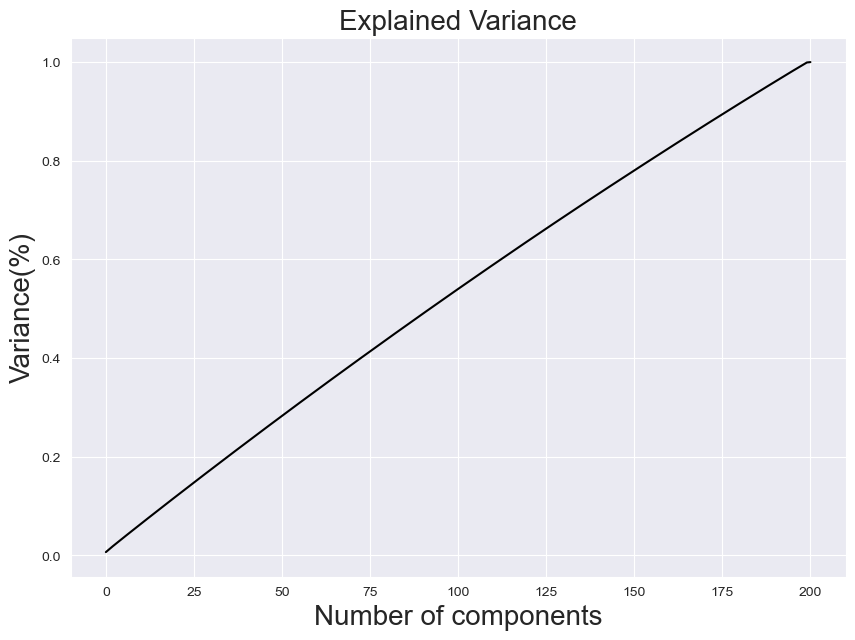

In [18]:
# Getting the optimal value of pca
from sklearn.decomposition import PCA
pca = PCA() 
principlecomponent = pca.fit_transform(data)  
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color ='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) 
plt.title('Explained Variance',fontsize=20)
plt.show()

* In this plot, we can clearly observe that the line representing the number of components remains consistently straight. This indicates that the feature holds significant importance. As a result, we have decided to select 175 features, as this selection minimizes variance loss

In [19]:
# Selecting the components
pca = PCA(n_components=175)
new_data = pca.fit_transform(data)
new_data

array([[ 0.51758867,  0.26955976,  0.05402251, ..., -0.91197506,
         0.02825685, -0.01823824],
       [-1.32400732, -0.53357927,  1.95817087, ..., -0.11897006,
        -0.04993349, -0.091531  ],
       [ 0.04224386, -0.81522866, -0.3257926 , ..., -0.04433698,
        -1.15220835, -0.52020052],
       ...,
       [-0.01423866,  0.55522966,  0.65142503, ..., -0.13624811,
        -0.40374922,  0.61777042],
       [ 0.40689894,  0.23820526,  0.38221209, ...,  0.55847262,
         0.11239184, -0.75789081],
       [ 0.76575485, -0.16503883,  0.39951196, ..., -1.09182605,
        -0.47622989,  0.67725346]])

In [20]:
# Create a new dataframe
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30','pca31','pca32','pca33','pca34',
                            'pca35','pca36','pca37','pca38','pca39','pca40','pca41','pca42','pca43','pca44','pca45','pca46',
                            'pca47','pca48','pca49','pca50','pca51','pca52','pca53','pca54','pca55','pca56','pca57','pca58',
                            'pca59','pca60','pca61','pca62','pca63','pca64','pca65','pca66','pca67','pca68','pca69','pca70',
                            'pca71','pca72','pca73','pca74','pca75','pca76','pca77','pca78','pca79','pca80','pca81','pca82',
                            'pca83','pca84','pca85','pca86','pca87','pca88','pca89','pca90','pca91','pca92','pca93','pca94',
                            'pca95','pca96','pca97','pca98','pca99','pca100','pca101','pca102','pca103','pca104','pca105',
                            'pca106','pca107','pca108','pca109','pca110','pca111','pca112','pca113','pca114','pca115','pca116',
                            'pca117','pca118','pca119','pca120','pca121','pca122','pca123','pca124','pca125','pca126','pca127',
                            'pca128','pca129','pca130','pca131','pca132','pca133','pca134','pca135','pca136','pca137','pca138',
                            'pca139','pca140','pca141','pca142','pca143','pca144','pca145','pca146','pca147','pca148','pca149',
                            'pca150','pca151','pca152','pca153','pca154','pca155','pca156','pca157','pca158','pca159','pca160',
                            'pca161','pca162','pca163','pca164','pca165','pca166','pca167','pca168','pca169','pca170',
                            'pca171','pca172','pca173','pca174','pca175'])
principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100,pca101,pca102,pca103,pca104,pca105,pca106,pca107,pca108,pca109,pca110,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120,pca121,pca122,pca123,pca124,pca125,pca126,pca127,pca128,pca129,pca130,pca131,pca132,pca133,pca134,pca135,pca136,pca137,pca138,pca139,pca140,pca141,pca142,pca143,pca144,pca145,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155,pca156,pca157,pca158,pca159,pca160,pca161,pca162,pca163,pca164,pca165,pca166,pca167,pca168,pca169,pca170,pca171,pca172,pca173,pca174,pca175
0,0.517589,0.269560,0.054023,-0.369893,0.835381,0.662795,1.319730,1.064223,-0.849499,0.433281,0.099748,0.189458,0.036275,0.666101,-0.022342,-0.761547,-0.166639,0.030342,-0.068087,1.435869,0.548179,1.059613,-1.190722,-0.729638,-0.071145,0.078544,-0.887911,-0.807112,0.012292,-0.763784,-0.274470,-0.372900,-0.263387,-0.002814,-0.656367,-0.047525,0.682693,0.054722,0.088106,0.400059,0.216680,-0.921100,0.608908,0.340632,0.704269,-0.170687,-0.654300,1.061424,-0.483177,1.065057,-1.490633,0.388312,-0.253202,0.513145,1.014501,-0.233567,-0.107051,-0.773744,0.066686,-0.477828,0.881100,0.525298,1.033929,0.201180,-0.691202,-0.487673,0.445280,-0.124135,-1.776024,-0.074610,-0.685690,0.032297,0.050818,0.034366,0.397986,-1.170827,0.368282,0.595141,1.006387,-0.382024,-0.535029,-0.493931,0.756615,0.714640,0.164489,0.506951,0.682040,-0.319673,1.048802,0.270264,0.624894,0.068417,-0.701790,0.475613,-0.198829,-0.755601,0.329829,-0.150092,1.165510,-1.094786,0.607245,0.807198,0.182657,0.224932,-1.100740,0.356435,0.452096,0.107081,-0.001502,1.180537,-0.631718,-0.756883,-1.088512,-0.304309,-0.186437,0.176686,-0.926008,-0.804948,0.792421,-1.048378,-0.797376,1.107738,0.291139,-0.053988,-1.002628,0.755661,-0.211778,0.234515,0.266976,-0.328136,0.648342,0.498883,0.522072,0.584286,-0.637994,0.123388,-0.333348,1.680633,0.620728,-0.031284,0.976753,-0.287220,0.397111,-0.959304,0.769188,-0.401486,-0.294892,-0.331451,0.103151,-1.979216,0.167794,-0.214290,0.403365,-0.544890,0.547660,-0.513307,-0.598169,-0.702461,-0.554514,-0.282646,0.129703,-1.053936,-0.667963,-0.169669,-1.219645,-0.554410,-0.611039,1.112001,-0.258308,-0.751815,0.967646,-0.750007,-0.911975,0.028257,-0.018238
1,-1.324007,-0.533579,1.958171,1.308587,0.328150,0.049564,-1.179654,0.139923,0.443926,0.601061,0.507448,0.290780,-2.031748,-1.611884,-0.508465,0.886412,-0.154350,-0.436477,-0.736805,-0.529373,1.095882,-0.959536,1.069778,1.143183,2.077901,-0.579774,1.045354,0.939488,0.376925,0.163353,0.055867,-0.105673,0.970089,0.221928,0.833694,1.083230,-0.575362,1.052924,-0.173764,-0.949257,-0.279215,-0.698407,0.107007,-0.484972,-1.349184,0.738426,-0.073452,-0.602862,0.583670,-0.220609,0.306837,-0.204201,-0.228406,0.633989,-0.153384,0.466705,-0.628820,-0.603458,-1.086874,1.179418,0.334649,0.610178,-0.116334,0.111064,-0.683004,1.137632,-0.223746,-0.423983,0.800753,0.838010,-0.190419,-0.771438,0.256354,0.129691,-0.351200,0.497553,-1.241447,-0.499981,0.798423,-0.622427,-0.289117,0.650573,-0.136576,0.584297,0.110860,0.206038,0.438245,-0.541694,0.912810,0.077358,0.330347,1.128143,0.679547,-0.558082,0.370086,0.233700,-0.451091,0.351500,0.282666,1.002136,0.024931,1.136643,-0.046010,-0.513514,1.083092,1.365194,0.171206,0.028797,-0.311181,0.808733,0.251169,-0.152583,0.291193,-0.772977,0.671171,1.461625,0.492782,-0.479170,0.949655,0.332061,-0.031731,-0.234562,0.318108,-1.348991,-0.399963,-0.732549,-0.580642,0.558389,0.892253,

## MODEL CREATION

### Aim
1. Focus on improving the F1 score in customer transaction prediction.
2. Create a balanced model that minimizes bias and variance.

### Algorithms to Experiment
1. Logistic Regression
2. Artificial NeuralNetwork (MLP Classifier)
3. XGB Classifier

## DEFINE INDEPENDANT AND DEPENDANT VERIABLE

In [21]:
X = principle_df
y = data.target

In [22]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100,pca101,pca102,pca103,pca104,pca105,pca106,pca107,pca108,pca109,pca110,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120,pca121,pca122,pca123,pca124,pca125,pca126,pca127,pca128,pca129,pca130,pca131,pca132,pca133,pca134,pca135,pca136,pca137,pca138,pca139,pca140,pca141,pca142,pca143,pca144,pca145,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155,pca156,pca157,pca158,pca159,pca160,pca161,pca162,pca163,pca164,pca165,pca166,pca167,pca168,pca169,pca170,pca171,pca172,pca173,pca174,pca175
0,0.517589,0.269560,0.054023,-0.369893,0.835381,0.662795,1.319730,1.064223,-0.849499,0.433281,0.099748,0.189458,0.036275,0.666101,-0.022342,-0.761547,-0.166639,0.030342,-0.068087,1.435869,0.548179,1.059613,-1.190722,-0.729638,-0.071145,0.078544,-0.887911,-0.807112,0.012292,-0.763784,-0.274470,-0.372900,-0.263387,-0.002814,-0.656367,-0.047525,0.682693,0.054722,0.088106,0.400059,0.216680,-0.921100,0.608908,0.340632,0.704269,-0.170687,-0.654300,1.061424,-0.483177,1.065057,-1.490633,0.388312,-0.253202,0.513145,1.014501,-0.233567,-0.107051,-0.773744,0.066686,-0.477828,0.881100,0.525298,1.033929,0.201180,-0.691202,-0.487673,0.445280,-0.124135,-1.776024,-0.074610,-0.685690,0.032297,0.050818,0.034366,0.397986,-1.170827,0.368282,0.595141,1.006387,-0.382024,-0.535029,-0.493931,0.756615,0.714640,0.164489,0.506951,0.682040,-0.319673,1.048802,0.270264,0.624894,0.068417,-0.701790,0.475613,-0.198829,-0.755601,0.329829,-0.150092,1.165510,-1.094786,0.607245,0.807198,0.182657,0.224932,-1.100740,0.356435,0.452096,0.107081,-0.001502,1.180537,-0.631718,-0.756883,-1.088512,-0.304309,-0.186437,0.176686,-0.926008,-0.804948,0.792421,-1.048378,-0.797376,1.107738,0.291139,-0.053988,-1.002628,0.755661,-0.211778,0.234515,0.266976,-0.328136,0.648342,0.498883,0.522072,0.584286,-0.637994,0.123388,-0.333348,1.680633,0.620728,-0.031284,0.976753,-0.287220,0.397111,-0.959304,0.769188,-0.401486,-0.294892,-0.331451,0.103151,-1.979216,0.167794,-0.214290,0.403365,-0.544890,0.547660,-0.513307,-0.598169,-0.702461,-0.554514,-0.282646,0.129703,-1.053936,-0.667963,-0.169669,-1.219645,-0.554410,-0.611039,1.112001,-0.258308,-0.751815,0.967646,-0.750007,-0.911975,0.028257,-0.018238
1,-1.324007,-0.533579,1.958171,1.308587,0.328150,0.049564,-1.179654,0.139923,0.443926,0.601061,0.507448,0.290780,-2.031748,-1.611884,-0.508465,0.886412,-0.154350,-0.436477,-0.736805,-0.529373,1.095882,-0.959536,1.069778,1.143183,2.077901,-0.579774,1.045354,0.939488,0.376925,0.163353,0.055867,-0.105673,0.970089,0.221928,0.833694,1.083230,-0.575362,1.052924,-0.173764,-0.949257,-0.279215,-0.698407,0.107007,-0.484972,-1.349184,0.738426,-0.073452,-0.602862,0.583670,-0.220609,0.306837,-0.204201,-0.228406,0.633989,-0.153384,0.466705,-0.628820,-0.603458,-1.086874,1.179418,0.334649,0.610178,-0.116334,0.111064,-0.683004,1.137632,-0.223746,-0.423983,0.800753,0.838010,-0.190419,-0.771438,0.256354,0.129691,-0.351200,0.497553,-1.241447,-0.499981,0.798423,-0.622427,-0.289117,0.650573,-0.136576,0.584297,0.110860,0.206038,0.438245,-0.541694,0.912810,0.077358,0.330347,1.128143,0.679547,-0.558082,0.370086,0.233700,-0.451091,0.351500,0.282666,1.002136,0.024931,1.136643,-0.046010,-0.513514,1.083092,1.365194,0.171206,0.028797,-0.311181,0.808733,0.251169,-0.152583,0.291193,-0.772977,0.671171,1.461625,0.492782,-0.479170,0.949655,0.332061,-0.031731,-0.234562,0.318108,-1.348991,-0.399963,-0.732549,-0.580642,0.558389,0.892253,

In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### BALANCING THE TARGET COLUMN USING SMOTE

In [24]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE() 
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({0: 179902, 1: 20098})
balanced data:    : Counter({0: 179902, 1: 179902})


### SPLIT TRAINING AND TESTING DATA

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.30) 
# 30% data given to testing because the large amount of data

In [26]:
# Check shape of train and test
X_train.shape

(251862, 175)

In [27]:
X_test.shape

(107942, 175)

In [28]:
y_train.shape

(251862,)

In [29]:
y_test.shape

(107942,)

### 1.Logistic Regression

In [30]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
log_reg = LogisticRegression()

# Step:3 fitting traing data
log_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_reg.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_reg.predict(X_train)

### EVALUATION

### TRAINING ACCURACY

In [31]:
# Import library
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 83.59935202610954
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83    123987
           1       0.84      0.83      0.84    127875

    accuracy                           0.84    251862
   macro avg       0.84      0.84      0.84    251862
weighted avg       0.84      0.84      0.84    251862



* Logistic regression training score is very poor

### TESTING ACCURACY

In [32]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 83.59935202610954
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83    123987
           1       0.84      0.83      0.84    127875

    accuracy                           0.84    251862
   macro avg       0.84      0.84      0.84    251862
weighted avg       0.84      0.84      0.84    251862



In [33]:
log_f1_score = recall_score(log_test_predict,y_test)
log_f1_score*100

83.14169241175073

### 2.ANN [MLP Classifier]

In [34]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=100,
                      random_state=42)

In [35]:
# Step:2 Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=100, random_state=42)

In [36]:
# Step:3 Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[0.99895279, 0.00104721],
       [0.88686649, 0.11313351],
       [0.07346767, 0.92653233],
       ...,
       [0.01454589, 0.98545411],
       [0.94901407, 0.05098593],
       [0.98153186, 0.01846814]])

In [37]:
# Step:4 Prediction on test data
mlp_test_predict = model.predict(X_test)

# Step:5 Prediction on training data
mlp_train_predict = model.predict(X_train)

### EVALUATION

### TRAINING ACCURACY

In [38]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 93.72235589330666
Classification report of training:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94    125417
           1       0.94      0.94      0.94    126445

    accuracy                           0.94    251862
   macro avg       0.94      0.94      0.94    251862
weighted avg       0.94      0.94      0.94    251862



* The Artificial Neural Network Multilayer Perceptron classifier model performs exceptionally well on the training dataset

### TESTING ACCURACY

In [39]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 90.41522299012432
Classification report of testing:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     53146
           1       0.91      0.90      0.90     54796

    accuracy                           0.90    107942
   macro avg       0.90      0.90      0.90    107942
weighted avg       0.90      0.90      0.90    107942



In [40]:
mlp_f1_score = f1_score(mlp_test_predict,y_test)
print('F1 Score',mlp_f1_score*100)

F1 Score 90.48556189074858


* ANN MLP classifier model testing accuracy also good.

### 3.XGB Classifier

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Step:1 importing library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 fitting the training data
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

### EVALUATION

### TRAINING ACCURACY

In [44]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy XGB classifier:",xgb_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(xgb_train_predict,y_train))

Training accuracy XGB classifier: 93.79501473028881
Classification report of training:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94    125138
           1       0.94      0.94      0.94    126724

    accuracy                           0.94    251862
   macro avg       0.94      0.94      0.94    251862
weighted avg       0.94      0.94      0.94    251862



* The XGBoost classifier model demonstrates excellent performance on the training data

### TESTING ACCURACY

In [45]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy XGB classifier:",xgb_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(xgb_test_predict,y_test))

Testing accuracy XGB classifier: 90.65609308702822
Classification report of training:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     53220
           1       0.91      0.90      0.91     54722

    accuracy                           0.91    107942
   macro avg       0.91      0.91      0.91    107942
weighted avg       0.91      0.91      0.91    107942



In [46]:
xgb_f1_score = f1_score(xgb_test_predict,y_test)
print("F1 score of xgb:",xgb_f1_score*100)

F1 score of xgb: 90.71834796532494


* The accuracy score of the XGBoost classifier model is impressive as well

## NOTE:
* Based on the XGBoost and MLP classifier models, I initially employed hyperparameter tuning. However, due to the large dataset size, the fitting process took an excessively long time. Despite trying to mitigate this on Google Colab, the issue persisted. Consequently, I decided to remove all hyperparameter tuning to save time.

## OBSERVATION:
* The logistic regression model shows poor performance in both the training and testing phases
* The ANN MLP classifier model performs exceptionally well on both the training and testing datasets. The training accuracy is 93.72%, the testing accuracy is 90.41% , and the F1 score is 90.48.
* The XGBoost classifier model performs strongly on both training and testing datasets. The training accuracy is 93.79%, the testing accuracy is 90.65%, and the F1 score is 90.71

## MODEL SAVING

In [47]:
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(model,file)